# Big_Data_Mart_Sales_Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
train=pd.read_csv('Big_Datamart_Train.csv')
test=pd.read_csv('Big_Datamart_Test.csv')

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

In [5]:
#Combine test and train into one file;

train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)

In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [7]:
#Numerical data summary;

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Cleaning:-

checking the missing values

In [8]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Filling of the missing values

In [9]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [10]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [11]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [12]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [13]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [15]:
#Item type combine;

data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [16]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Item_Type_Combined            object
dtype: object

The data types shows that Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,
Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Type_Combined are "object" type, 
and rest are "integer" and "float" type.

# EDA:-

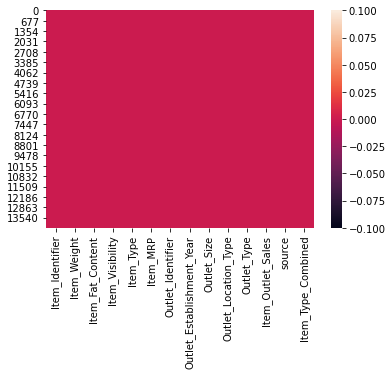

In [17]:
sns.heatmap(data.isnull())
plt.show()

In [ ]:
# No null values are there, above heatmap shows.

In [18]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Type_Combined'],
      dtype='object')

In [19]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Type_Combined
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,Food
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,Drinks


In [20]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [21]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

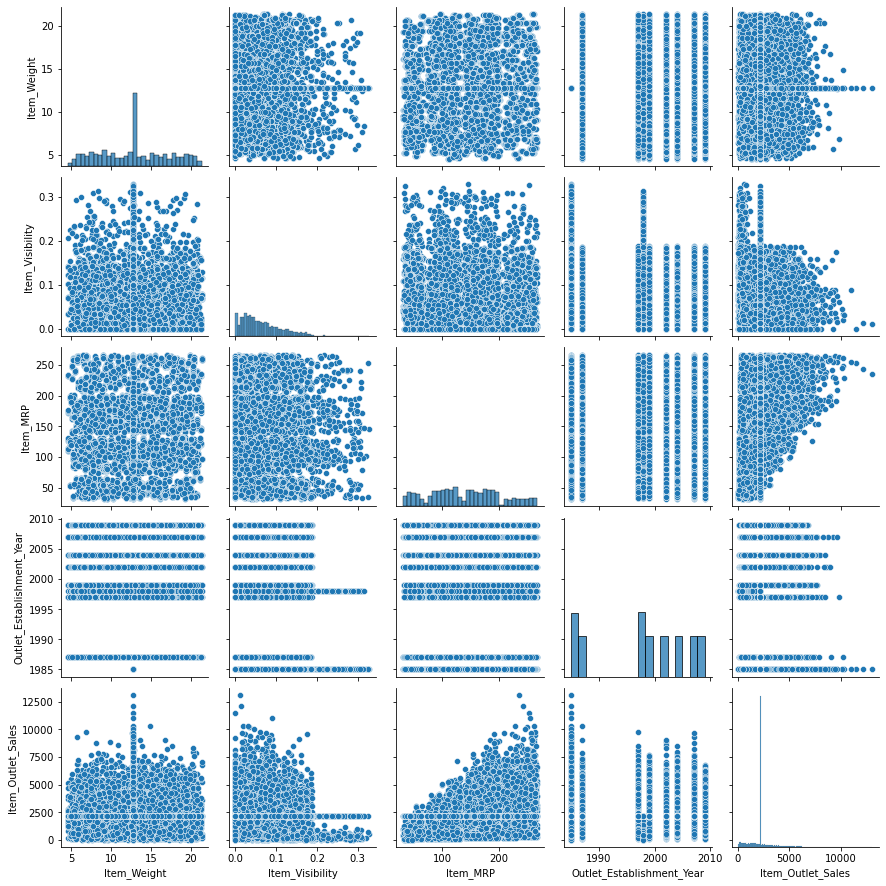

In [22]:
sns.pairplot(data)
plt.show()

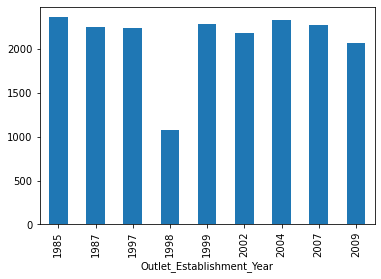

In [23]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()
plt.show()

Numerical and Encoding of Categorical variables

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

#New variable for outlet

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Item_Identifier','Outlet_Location_Type','Item_Type',           
           'Outlet_Identifier','Outlet_Size','Item_Type_Combined','source',
           'Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [25]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.138000,1,1,9
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.422800,1,0,3
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.270000,1,1,9
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.380000,1,1,0
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.705200,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,2,0.013496,13,141.3154,8,1997,2,0,1,2181.288914,0,1,8
14200,308,7.60,2,0.142991,15,169.1448,3,2009,1,2,2,2181.288914,0,1,3
14201,1426,10.00,1,0.073529,8,118.7440,7,2002,1,1,1,2181.288914,0,2,7
14202,521,15.30,2,0.000000,3,214.6218,2,2007,1,1,1,2181.288914,0,1,2


# Correlation:-

In [26]:
# Checking the Correlation with respect to target variable(Item_Outlet_Sales):-

data.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -9.990293e-02
Outlet_Size                 -6.675955e-02
Outlet_Establishment_Year   -3.806067e-02
source                      -3.873894e-15
Item_Identifier              2.220247e-03
Item_Fat_Content             7.608954e-03
Item_Weight                  8.569012e-03
Item_Type_Combined           8.703891e-03
Item_Type                    1.319431e-02
Outlet_Location_Type         6.922418e-02
Outlet_Identifier            1.257422e-01
Outlet                       1.257422e-01
Outlet_Type                  3.109888e-01
Item_MRP                     4.409786e-01
Item_Outlet_Sales            1.000000e+00
Name: Item_Outlet_Sales, dtype: float64

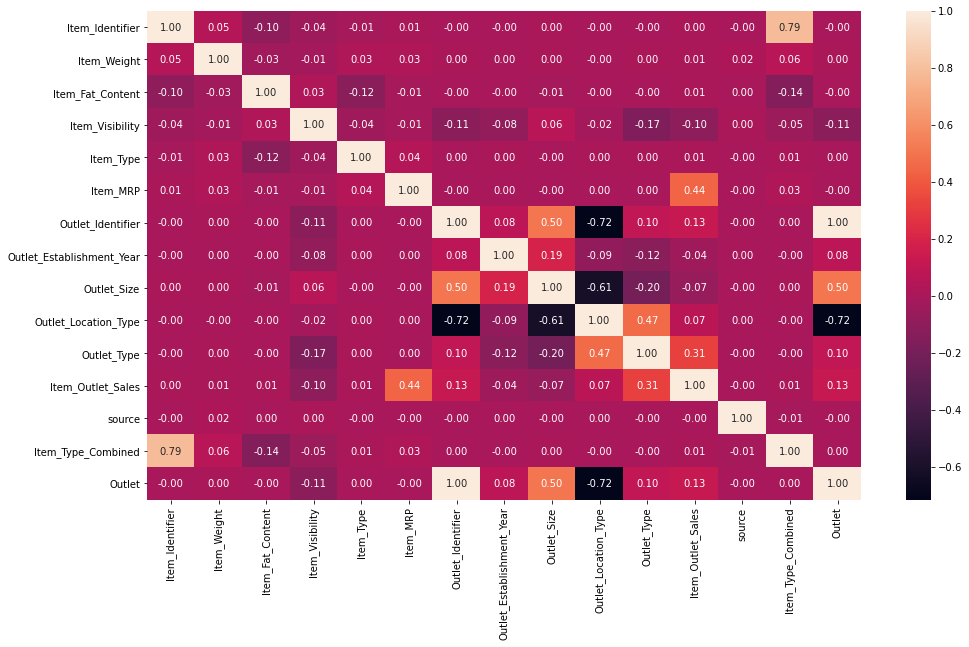

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True,fmt='0.2f')
plt.show()

Above heatmap shows a good correlation with the target variable in 
which 'Item_Identifier','Item_Fat_Content','Item_Weight',
Item_Type_Combined','Outlet_Location_Type','Outlet_Type' and
'Item_MRP' are highly correlated.

# Reducing Multicollinearity with Variation Inflation Factor:-

In [32]:
import statsmodels.api as sm
import scipy.stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Type_Combined,Outlet
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,1,1,9
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,1,0,3
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,1,1,9
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,1,1,0
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,2,0.013496,13,141.3154,8,1997,2,0,1,0,1,8
14200,308,7.60,2,0.142991,15,169.1448,3,2009,1,2,2,0,1,3
14201,1426,10.00,1,0.073529,8,118.7440,7,2002,1,1,1,0,2,7
14202,521,15.30,2,0.000000,3,214.6218,2,2007,1,1,1,0,1,2


In [37]:
y=data['Item_Outlet_Sales']
y

0        3735.138000
1         443.422800
2        2097.270000
3         732.380000
4         994.705200
            ...     
14199    2181.288914
14200    2181.288914
14201    2181.288914
14202    2181.288914
14203    2181.288914
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [38]:
x.shape

(14204, 14)

In [39]:
x.shape[1]

14

In [42]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [43]:
calc_vif(x)

    VIF FACTOR                   Features
0    10.598999            Item_Identifier
1    10.190477                Item_Weight
2     5.740047           Item_Fat_Content
3     2.775095            Item_Visibility
4     4.020622                  Item_Type
5     6.183292                   Item_MRP
6          inf          Outlet_Identifier
7    65.196415  Outlet_Establishment_Year
8     7.962953                Outlet_Size
9    16.598557       Outlet_Location_Type
10    8.432329                Outlet_Type
11    2.501068                     source
12   14.497657         Item_Type_Combined
13         inf                     Outlet


Above observations shows that 'Outlet_Establishment_Year','Outlet_Location_Type', 
and 'Item_Type_Combined' have very high multicollinearity .so, we will drop them.

In [45]:
data=data.drop(['Outlet_Establishment_Year','Outlet_Location_Type','Item_Type_Combined'],axis=1)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales,source,Outlet
0,156,9.30,1,0.016047,4,249.8092,9,1,1,3735.138000,1,9
1,8,5.92,2,0.019278,14,48.2692,3,1,2,443.422800,1,3
2,662,17.50,1,0.016760,10,141.6180,9,1,1,2097.270000,1,9
3,1121,19.20,2,0.000000,6,182.0950,0,1,0,732.380000,1,0
4,1297,8.93,1,0.000000,9,53.8614,1,0,1,994.705200,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,2,0.013496,13,141.3154,8,2,1,2181.288914,0,8
14200,308,7.60,2,0.142991,15,169.1448,3,1,2,2181.288914,0,3
14201,1426,10.00,1,0.073529,8,118.7440,7,1,1,2181.288914,0,7
14202,521,15.30,2,0.000000,3,214.6218,2,1,1,2181.288914,0,2


In [46]:
data.shape

(14204, 12)

# Checking for the Skewness:-

In [47]:
data.skew()

Item_Identifier     -0.004897
Item_Weight          0.111314
Item_Fat_Content     0.996640
Item_Visibility      1.195175
Item_Type            0.099574
Item_MRP             0.130728
Outlet_Identifier   -0.059994
Outlet_Size         -0.087077
Outlet_Type          0.927344
Item_Outlet_Sales    1.520025
source              -0.408471
Outlet              -0.059994
dtype: float64

In [ ]:
#Above data shows that 'Item_Visibility','Item_MRP'
#'Item_Outlet_Sales', and 'Outlet'
#'Outlet' are highly skewed.

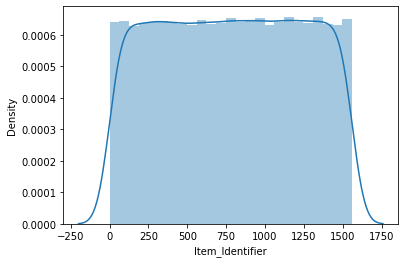

In [48]:
# checking with the distribution curve:-

sns.distplot(data['Item_Identifier'])
plt.show()

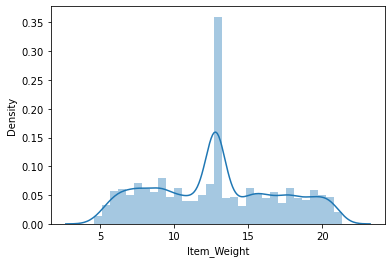

In [49]:
sns.distplot(data['Item_Weight'])
plt.show()

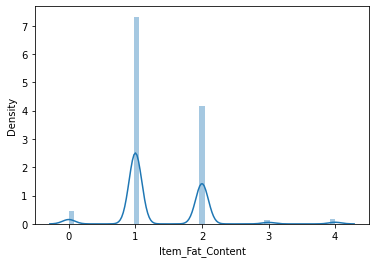

In [50]:
sns.distplot(data['Item_Fat_Content'])
plt.show()

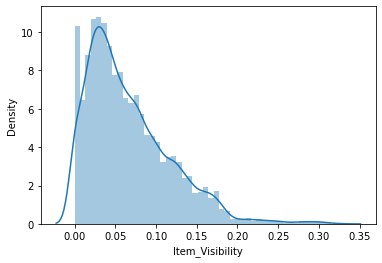

In [51]:
sns.distplot(data['Item_Visibility'])
plt.show()

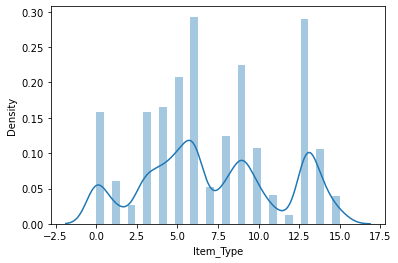

In [52]:
sns.distplot(data['Item_Type'])
plt.show()

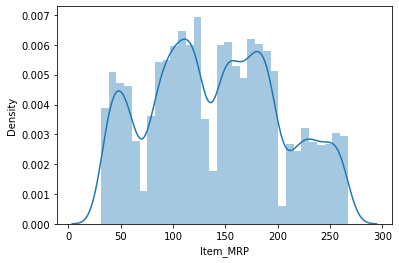

In [53]:
sns.distplot(data['Item_MRP'])
plt.show()

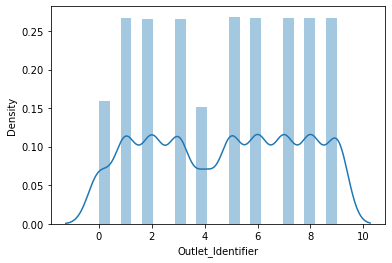

In [54]:
sns.distplot(data['Outlet_Identifier'])
plt.show()

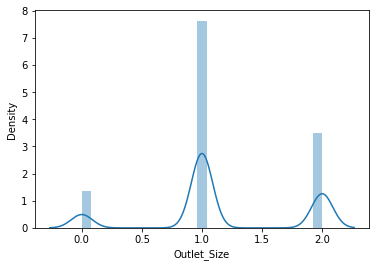

In [55]:
sns.distplot(data['Outlet_Size'])
plt.show()

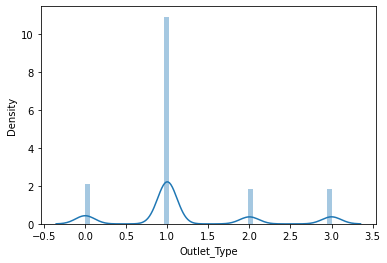

In [56]:
sns.distplot(data['Outlet_Type'])
plt.show()

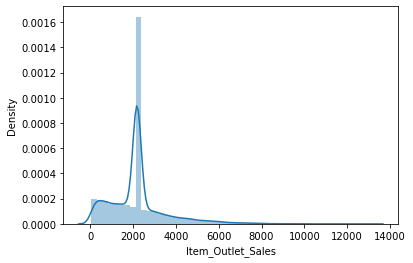

In [57]:
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

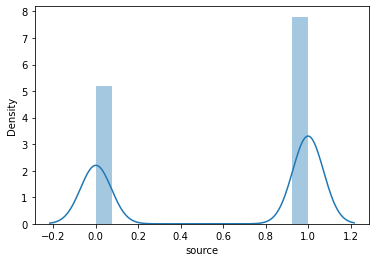

In [58]:
sns.distplot(data['source'])
plt.show()

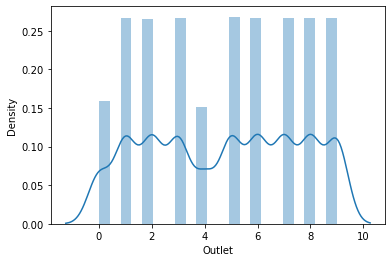

In [59]:
sns.distplot(data['Outlet'])
plt.show()

In [ ]:
#Above visualizations shows that the is not normalized.
#The building blocks is out of normalized curve.

# Outliers Removal:-

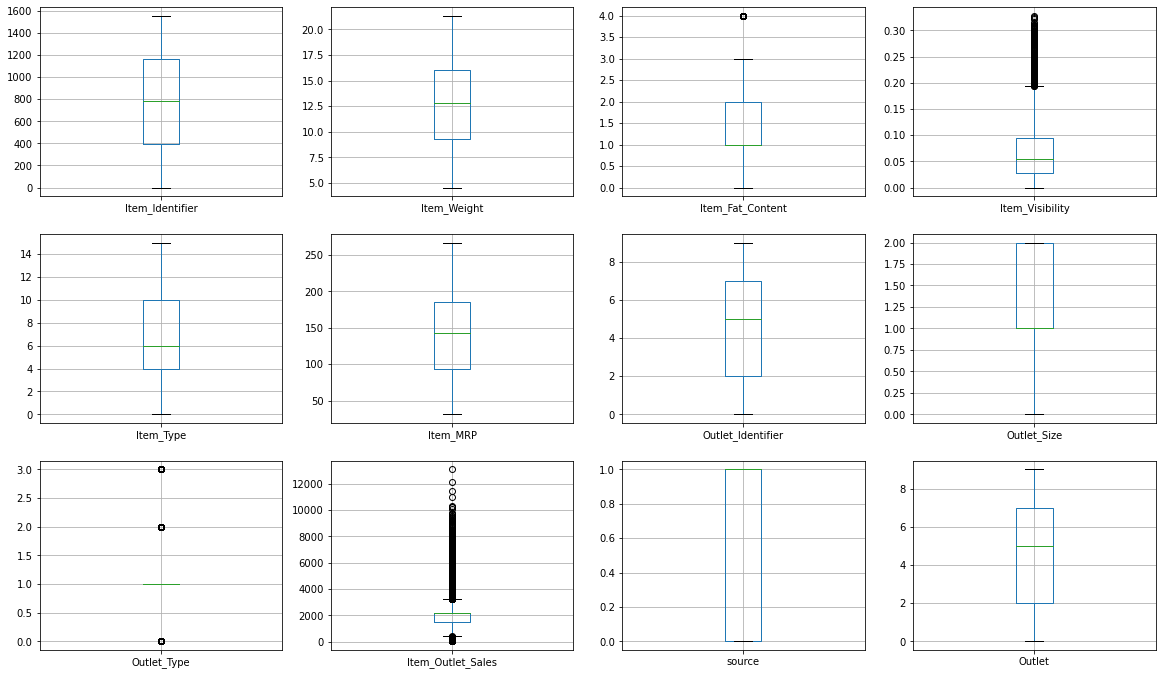

In [60]:
# checking the outliers with visualization:-

data.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.38831978e+00, 8.24938722e-01, 5.73813739e-01, ...,
        1.17553945e+00, 8.16424728e-01, 1.50776361e+00],
       [1.71749847e+00, 1.62322365e+00, 9.80725713e-01, ...,
        1.31475456e+00, 8.16424728e-01, 6.07145468e-01],
       [2.62884524e-01, 1.11172885e+00, 5.73813739e-01, ...,
        6.35631532e-02, 8.16424728e-01, 1.50776361e+00],
       ...,
       [1.43638925e+00, 6.59613442e-01, 5.73813739e-01, ...,
        1.72015885e-15, 1.22485266e+00, 8.02793914e-01],
       [5.76493952e-01, 5.92135112e-01, 9.80725713e-01, ...,
        1.72015885e-15, 1.22485266e+00, 9.59630314e-01],
       [4.82215889e-01, 7.77702928e-01, 9.80725713e-01, ...,
        1.72015885e-15, 1.22485266e+00, 8.02793914e-01]])

In [62]:
# index no.

np.where(z>3)

(array([   43,    49,    55,    81,    83,   108,   130,   132,   145,
          146,   151,   174,   199,   203,   240,   243,   275,   276,
          304,   333,   337,   339,   373,   396,   402,   424,   434,
          456,   472,   489,   497,   502,   521,   532,   615,   640,
          641,   661,   694,   727,   753,   753,   809,   838,   844,
          854,   891,   903,   915,   935,   991,   997,  1009,  1010,
         1012,  1034,  1040,  1043,  1067,  1090,  1092,  1113,  1124,
         1127,  1133,  1138,  1159,  1183,  1209,  1254,  1272,  1291,
         1311,  1324,  1348,  1363,  1372,  1393,  1433,  1434,  1450,
         1496,  1501,  1506,  1512,  1542,  1549,  1560,  1564,  1565,
         1575,  1576,  1601,  1611,  1615,  1617,  1627,  1644,  1650,
         1651,  1658,  1669,  1684,  1700,  1705,  1709,  1710,  1723,
         1751,  1753,  1769,  1805,  1821,  1827,  1835,  1841,  1859,
         1879,  1987,  1996,  1998,  2040,  2062,  2088,  2107,  2109,
      

In [63]:
data_new=data[(z<3).all(axis=1)]
data_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales,source,Outlet
0,156,9.30,1,0.016047,4,249.8092,9,1,1,3735.138000,1,9
1,8,5.92,2,0.019278,14,48.2692,3,1,2,443.422800,1,3
2,662,17.50,1,0.016760,10,141.6180,9,1,1,2097.270000,1,9
3,1121,19.20,2,0.000000,6,182.0950,0,1,0,732.380000,1,0
4,1297,8.93,1,0.000000,9,53.8614,1,0,1,994.705200,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,2,0.013496,13,141.3154,8,2,1,2181.288914,0,8
14200,308,7.60,2,0.142991,15,169.1448,3,1,2,2181.288914,0,3
14201,1426,10.00,1,0.073529,8,118.7440,7,1,1,2181.288914,0,7
14202,521,15.30,2,0.000000,3,214.6218,2,1,1,2181.288914,0,2


In [64]:
data.shape

(14204, 12)

In [65]:
data_new.shape

(13589, 12)

In [66]:
# percentage data loss:-

loss_percent=(14204-13789)/(14204*100)
print(loss_percent,'%')

0.000292171219374824 %


In [67]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(data,method='yeo-johnson')
X

array([[-1.4625458 , -0.80254709, -0.52221563, ...,  1.16800977,
         0.81642473,  1.42739636],
       [-2.09830592, -1.72441311,  1.01216477, ..., -1.61934542,
         0.81642473, -0.54869197],
       [-0.15432399,  1.09748149, -0.52221563, ...,  0.08541899,
         0.81642473,  1.42739636],
       ...,
       [ 1.32632126, -0.62478807, -0.52221563, ...,  0.14914274,
        -1.22485266,  0.81045053],
       [-0.47359491,  0.62066597,  1.01216477, ...,  0.14914274,
        -1.22485266, -0.93094507],
       [ 0.53508696, -0.75137104,  1.01216477, ...,  0.14914274,
        -1.22485266,  0.81045053]])

In [68]:
X.ndim

2

In [69]:
X.std()

1.0

In [70]:
x=data_new.drop(['Item_Outlet_Sales'],axis=1)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,source,Outlet
0,156,9.30,1,0.016047,4,249.8092,9,1,1,1,9
1,8,5.92,2,0.019278,14,48.2692,3,1,2,1,3
2,662,17.50,1,0.016760,10,141.6180,9,1,1,1,9
3,1121,19.20,2,0.000000,6,182.0950,0,1,0,1,0
4,1297,8.93,1,0.000000,9,53.8614,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,2,0.013496,13,141.3154,8,2,1,0,8
14200,308,7.60,2,0.142991,15,169.1448,3,1,2,0,3
14201,1426,10.00,1,0.073529,8,118.7440,7,1,1,0,7
14202,521,15.30,2,0.000000,3,214.6218,2,1,1,0,2


In [71]:
y=data_new['Item_Outlet_Sales']
y

0        3735.138000
1         443.422800
2        2097.270000
3         732.380000
4         994.705200
            ...     
14199    2181.288914
14200    2181.288914
14201    2181.288914
14202    2181.288914
14203    2181.288914
Name: Item_Outlet_Sales, Length: 13589, dtype: float64

# Machine Learning Algorithms Training and Testing Process:-

In [72]:
# linear Regression;

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state",{i},train_accuracy)
    print("At random state",{i},test_accuracy)
    print("\n")

At random state {0} 0.2894527356697286
At random state {0} 0.25077211348043194


At random state {1} 0.284318460508701
At random state {1} 0.2743959364452514


At random state {2} 0.28693422946396385
At random state {2} 0.2643071066856959


At random state {3} 0.28560395449786924
At random state {3} 0.26968355888307793


At random state {4} 0.28644766653505493
At random state {4} 0.2662767575211179


At random state {5} 0.28530793830256085
At random state {5} 0.27075609881367024


At random state {6} 0.28144904411204785
At random state {6} 0.2858971482763022


At random state {7} 0.28057986101502164
At random state {7} 0.2890197518775266


At random state {8} 0.2809284191794792
At random state {8} 0.2884069437931799


At random state {9} 0.2859507089740112
At random state {9} 0.2672906393217114


At random state {10} 0.2853404080059847
At random state {10} 0.26983579247195644


At random state {11} 0.2858615248175037
At random state {11} 0.26810873181302275


At random state {12} 0.281

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=95)

In [74]:
s=mean_squared_error(y_train,pred_train)
print("Mean squared error of training set :%2f"%s)
p=mean_squared_error(y_test,pred_test)
print("Mean squared error of testing set :%2f"%p)

Mean squared error of training set :1633528.995837
Mean squared error of testing set :1607886.325588


In [75]:
# Support Vector Regression:-

from sklearn.svm import SVR
 
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.fit(x_test,y_test)

SVR(kernel='linear')

In [76]:
train_pred=svr.predict(x_train)
test_pred=svr.predict(x_test)

svr.score(x_train,y_train)

0.046327541560327146

In [77]:
svr.score(x_test,y_test)

0.05315935408917538

In [78]:
# Cross Validation:-

train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(j,cv_score,cv_mean,train_accuracy,test_accuracy)
    print("\n")

2 [ 0.1533315  -1.80367341] -0.8251709567901528 -0.27497118393635844 -0.31268187363509936


3 [ 2.93622331e-01  3.22559899e-01 -4.11638333e+30] -1.372127778210353e+30 -0.27497118393635844 -0.31268187363509936


4 [ 3.28820617e-01  3.34642193e-01  6.47194774e-02 -8.20153357e+29] -2.0503833931142603e+29 -0.27497118393635844 -0.31268187363509936


5 [ 3.43651600e-01  3.58789367e-01  3.48314881e-01 -2.76877900e+30
 -2.85622397e+30] -1.1250005936741905e+30 -0.27497118393635844 -0.31268187363509936


6 [ 3.53944089e-01  3.66382042e-01  3.59245006e-01  2.64331293e-01
 -2.59317607e+30 -6.41410046e+29] -5.390976866494269e+29 -0.27497118393635844 -0.31268187363509936


7 [ 3.60454558e-01  3.71174737e-01  3.69603048e-01  3.66176414e-01
 -8.30087061e-01 -2.46495878e+30 -2.40865950e+30] -6.962311830226132e+29 -0.27497118393635844 -0.31268187363509936


8 [ 3.68215346e-01  3.70444279e-01  3.80212078e-01  3.64535755e-01
  3.36331845e-01 -5.63745218e+29 -5.99359725e+29 -5.86296602e+29] -2.186751931045

# Hyperparameter Tuning:-

In [79]:
# Regularization;

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [80]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [81]:
# final model training;

ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

28.00522049581865

In [82]:
# Ensemble technique:-

from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf= RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [83]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
rf2=r2_score(y_test,pred_decision)
print('R2_Score',rf2)
rfs=cross_val_score(rf,x,y,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.9369952021999279
R2_Score 0.561951652074052
Cross_Val_Score 93.69952021999279


So, we are getting our model accuracy 94% with 
moderate R2_score 56% which shows that our model 
is performing good enough.

# Saving the Model:-

In [84]:
import pickle
filename='Big_Mart_Sales.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [85]:
loaded_model=pickle.load(open('Big_Mart_Sales.pkl','rb'))

In [86]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717
Predicted,3145.260455,2164.127404,503.912011,1748.638427,1595.851924,521.037668,2920.961655,373.953228,3011.08972,2100.320645,...,2927.218894,1490.853983,2200.51747,2246.474829,1799.546776,2181.288914,2943.862613,2067.187623,1405.450536,1784.045671
Original,3145.260455,2164.127404,503.912011,1748.638427,1595.851924,521.037668,2920.961655,373.953228,3011.08972,2100.320645,...,2927.218894,1490.853983,2200.51747,2246.474829,1799.546776,2181.288914,2943.862613,2067.187623,1405.450536,1784.045671


In [87]:
conclusion.transpose()

,Predicted,Original
0,3145.260455,3145.260455
1,2164.127404,2164.127404
2,503.912011,503.912011
3,1748.638427,1748.638427
4,1595.851924,1595.851924
...,...,...
2713,2181.288914,2181.288914
2714,2943.862613,2943.862613
2715,2067.187623,2067.187623
2716,1405.450536,1405.450536
